# (1 of 3) EDA
---
# Churn Prediction of bank customers
---

### We will predict which customers are likely to leave our company
by using Logistic Regression, KNN, SVM, Naive Bayes.

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---
# Exploratory Data Analysis
---

In [3]:
df = pd.read_csv('./dataset/Churn_Modelling.csv')

In [4]:
df.sample(5)

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
2645       2646    15765322  Connely          755    France    Male   23   
6284       6285    15623219    Smith          596    France    Male   33   
8202       8203    15747647  Iadanza          589     Spain  Female   27   
3859       3860    15694450  Bianchi          677    France    Male   42   
2471       2472    15595537    Trout          626   Germany    Male   49   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
2645       5   84284.48              2          1               1   
6284       8       0.00              1          1               0   
8202       4       0.00              2          1               0   
3859       5   99580.13              1          1               0   
2471       9  171787.84              2          1               0   

      EstimatedSalary  Exited  
2645         62851.60       0  
6284        121189.30       1  
8202        144181.48       0  
3859         21007.96       0  
2471        187192.23       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

The S.D. of estimated salary is 57510, which is a very high value and indicates that the data points have  high variation.

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
#print(df['Surname'].value_counts().to_string())
df['Surname'].value_counts()

Smith     32
Scott     29
Martin    29
Walker    28
Brown     26
          ..
Hodge      1
Corson     1
Lange      1
Vagin      1
Kegley     1
Name: Surname, Length: 2932, dtype: int64

There are many repeated surnames.

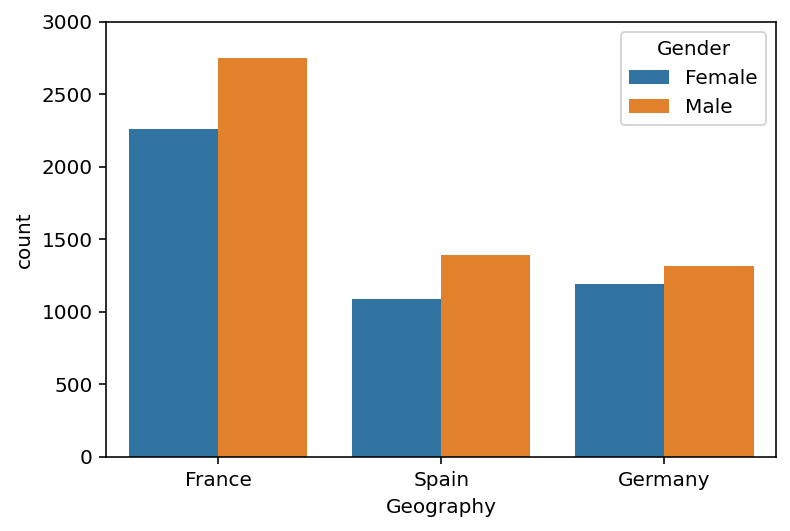

In [9]:
sns.countplot(x=df['Geography'], hue=df['Gender'])
plt.ylim(0,3000)
plt.show()

There are more males than females in every country.

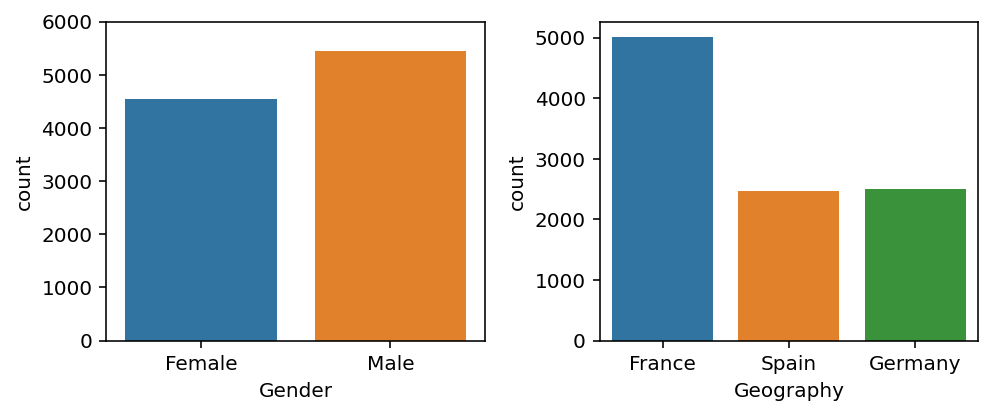

In [10]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
sns.countplot(x=df['Gender'], ax=ax[0])
ax[0].set(ylim=(0,6000))
sns.countplot(x=df['Geography'], ax=ax[1])
fig.tight_layout()

There are males, approximately 55% of the dataset.  

There are customers from France, approximately 50% of the dataset.  

The remaining customers are from Germany and Spain, each country has an approximately 25% of the dataset.

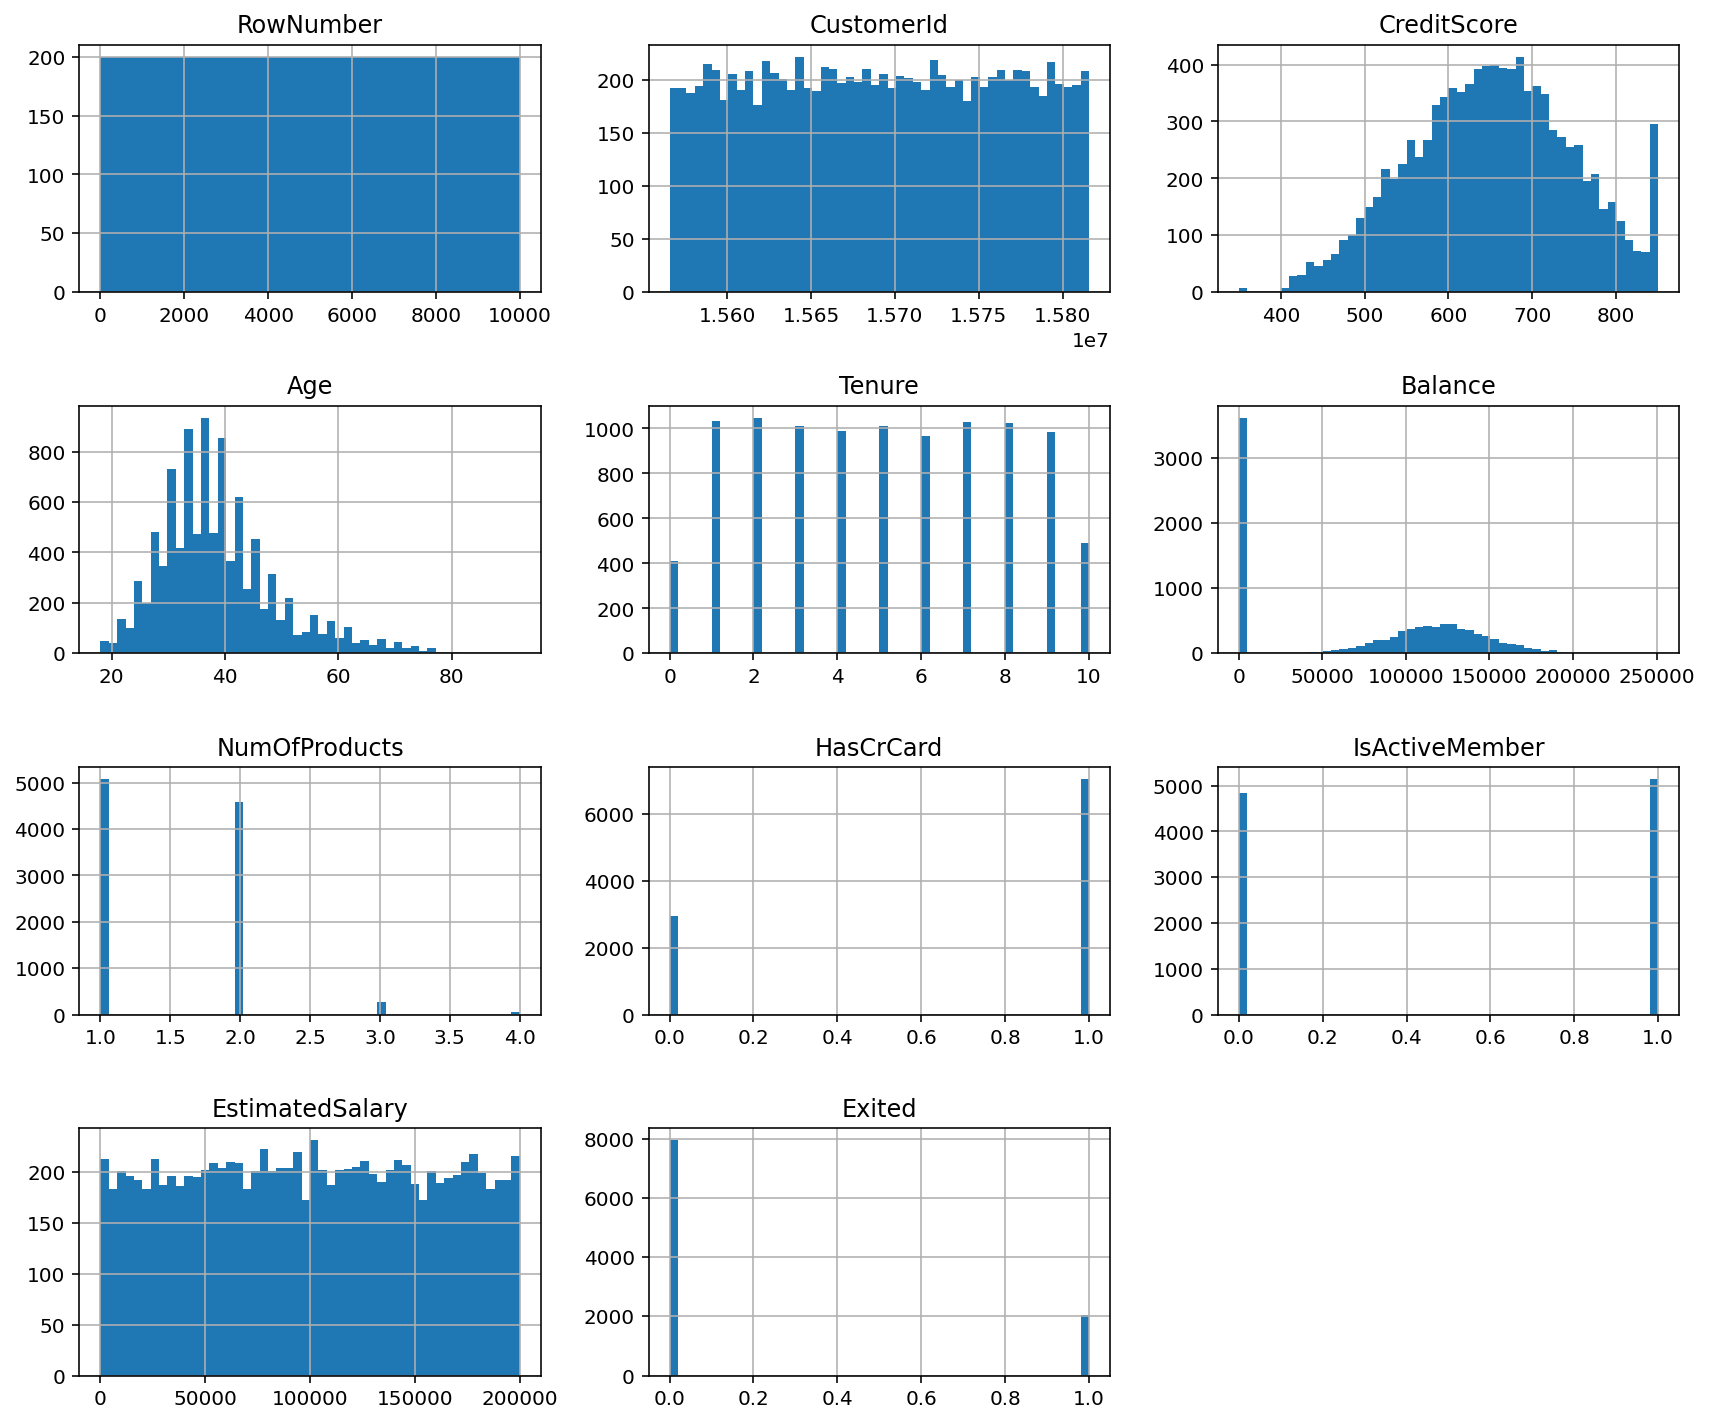

In [11]:
df.hist(bins=50, figsize=(12,10))
plt.tight_layout()

In [12]:
df[df['Balance']==0]['Balance'].count()

3617

In [13]:
df[df['CreditScore']>825]['CreditScore'].count()

396

- There are about 2,000 churned customers from 10,000 total customers.
> It's more challenging to predict customers who will churn compared to those who won't because the percentage of churned customers is relatively low.
- Active and non-active members, each one has an approximately 50% of the dataset.
- Approximately 3,500 customers have their credit cards.
- The account balance feature is approximately normally distributed, and over 3,000 customers have accounts with balance equal 0.
- The credit score feature is close to the skewed normal distribution, and many customers have their credit scores either at the maximum value or near the maximum value.
- The tenure feature has a uniform distribution.
- The salary feature has a uniform distribution.

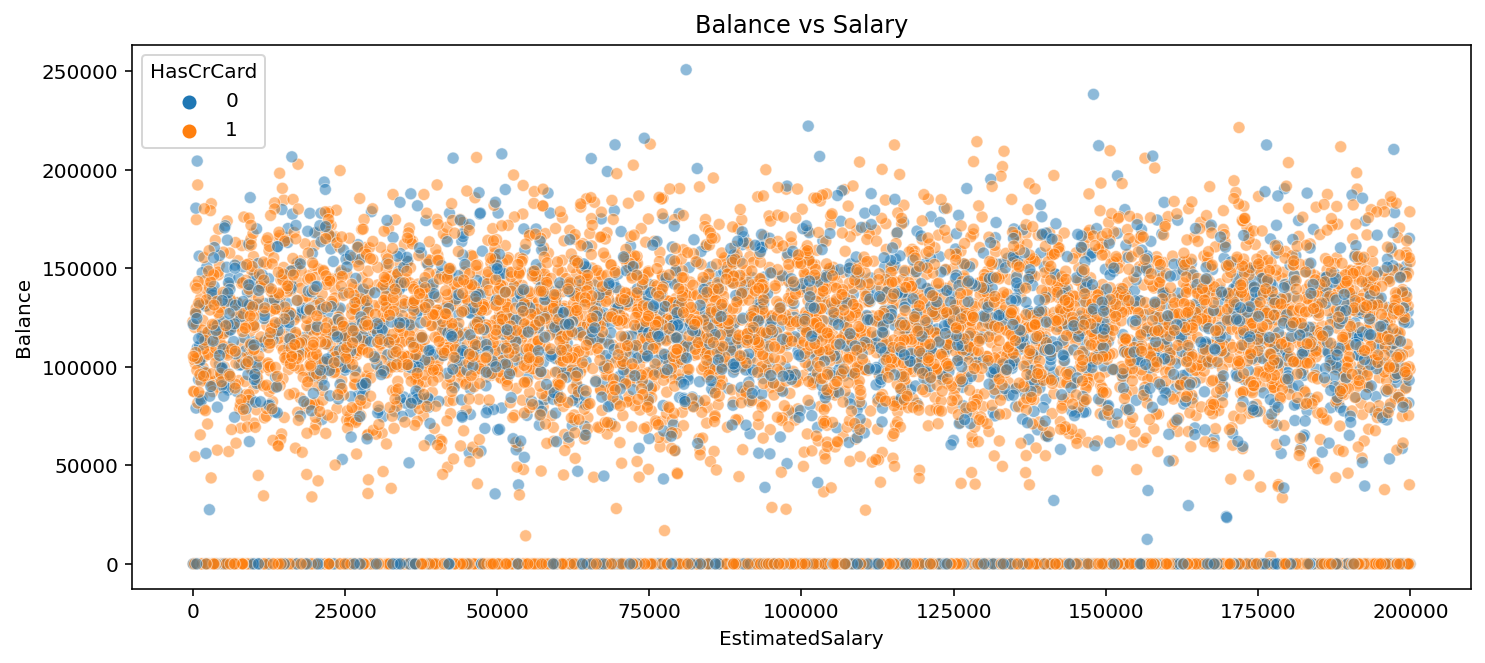

In [14]:
fig = plt.figure(figsize=(12,5))
sns.scatterplot(
    y='Balance', x='EstimatedSalary',
    hue='HasCrCard', data=df, alpha=.5)
plt.title('Balance vs Salary')
plt.show()

Individuals with a higher salary does not necessarily lead to having more balance in their accounts.

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

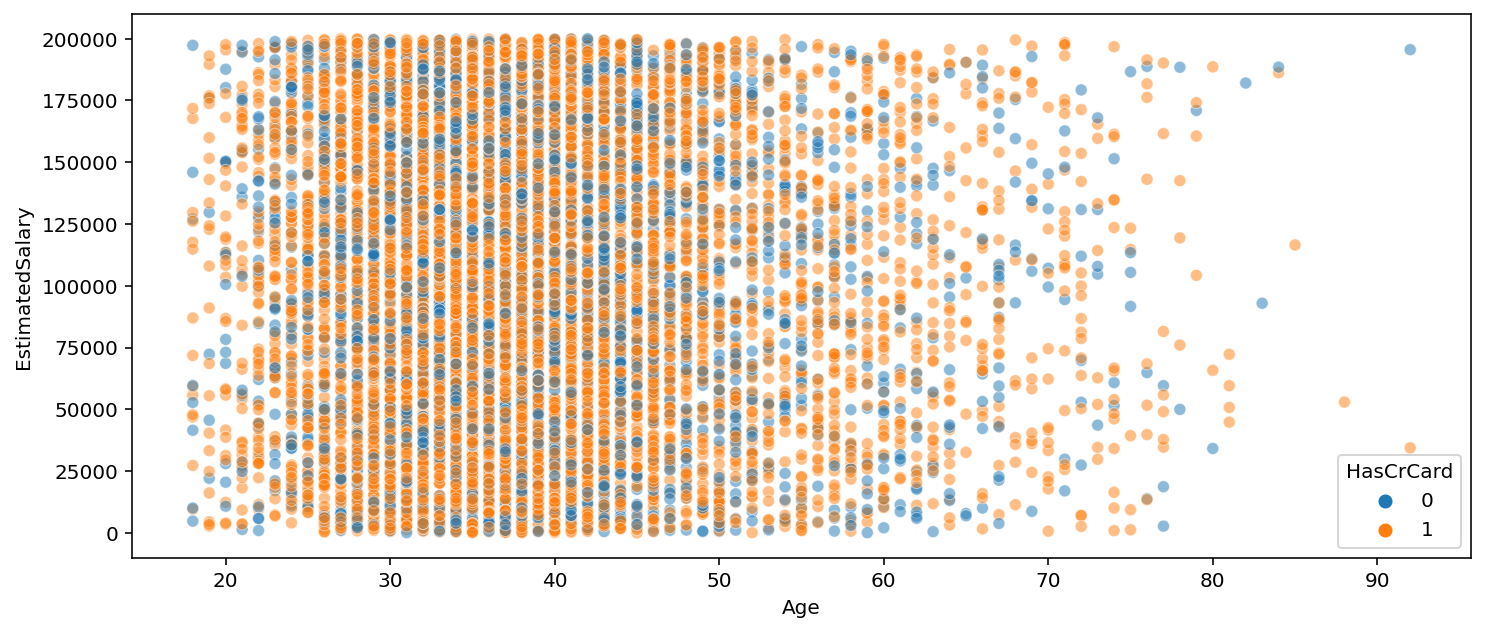

In [15]:
fig = plt.figure(figsize=(12,5))
sns.scatterplot(
    x='Age', y='EstimatedSalary',
    hue='HasCrCard', data=df, alpha=.5)

The chart shown that age does not significantly affect salary.

In [16]:
df_groupby_age = df.groupby('Age').mean()

In [17]:
px.scatter(
    df_groupby_age, x=df_groupby_age.index,
    y='EstimatedSalary', size='Balance', color='CreditScore',
    height=500, title='Credit Score (mark size by Account Balance)'
)

![](./img/img1.png) 

We do not gather any data insights from the credit score.

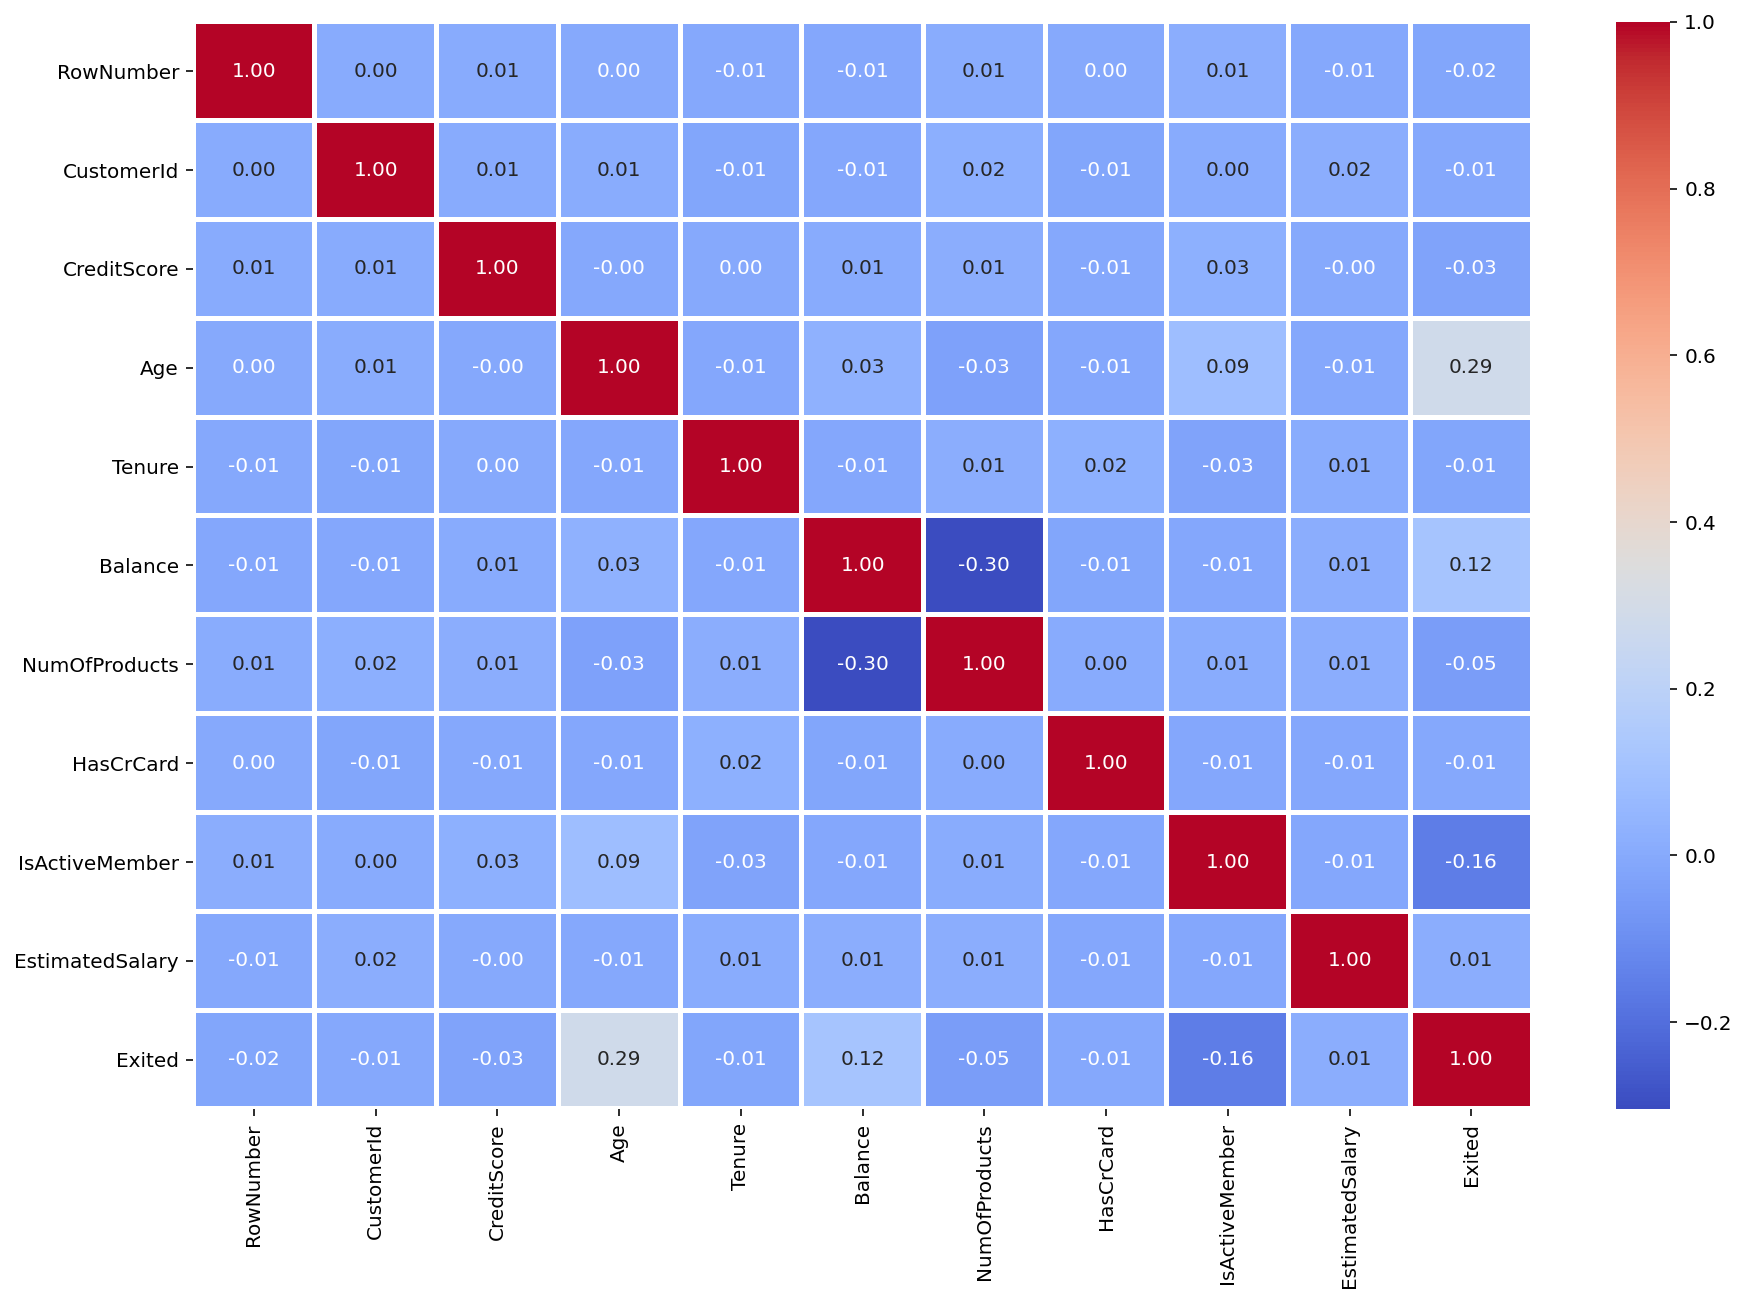

In [18]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(), annot=True, fmt='.2f',
    cmap='coolwarm', linecolor='white', linewidths=2)
plt.show()

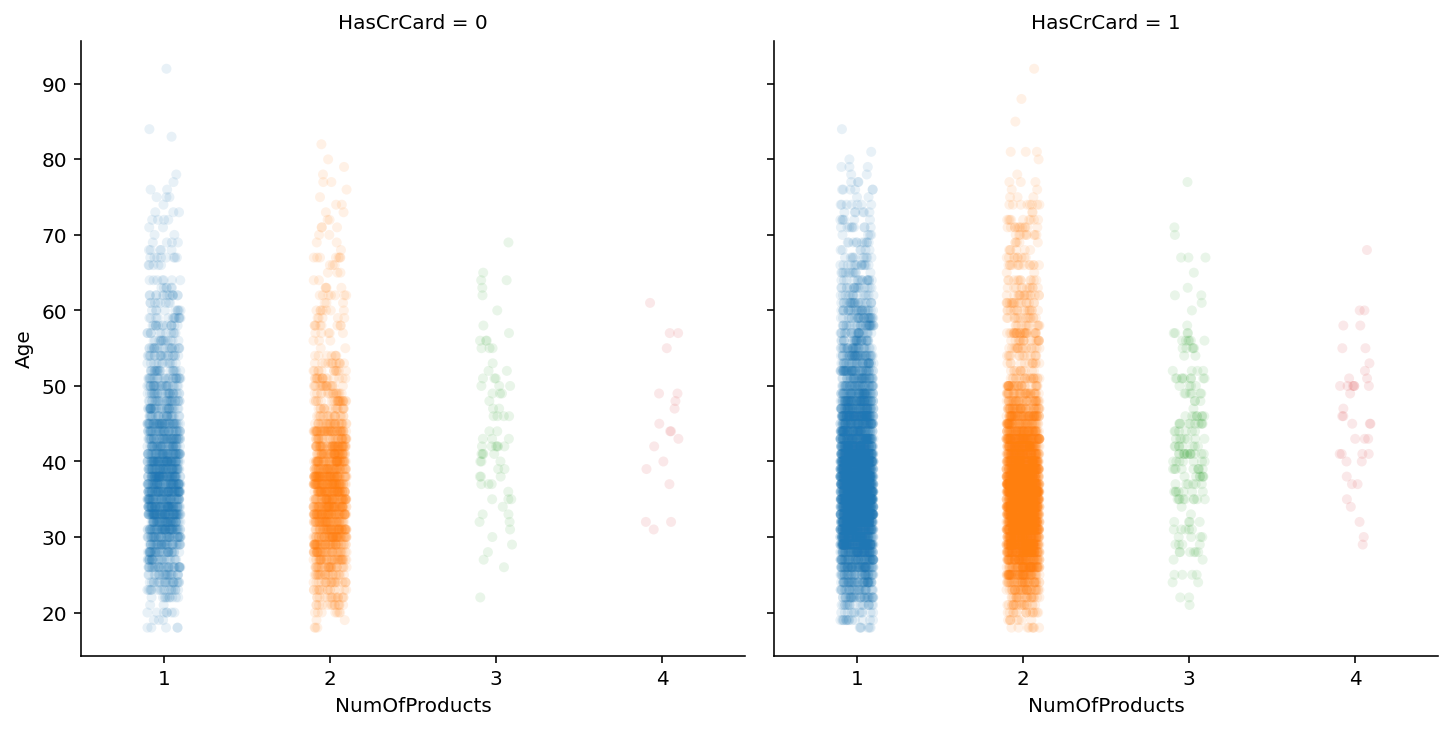

In [19]:
sns.catplot(
    x='NumOfProducts',y='Age', col='HasCrCard', data=df,
    alpha=.1, height=5, aspect=1)

The customers who use 1-2 products are mostly 30-40 years old.  
The customers who use 3-4 products are mostly 40-50 years old.

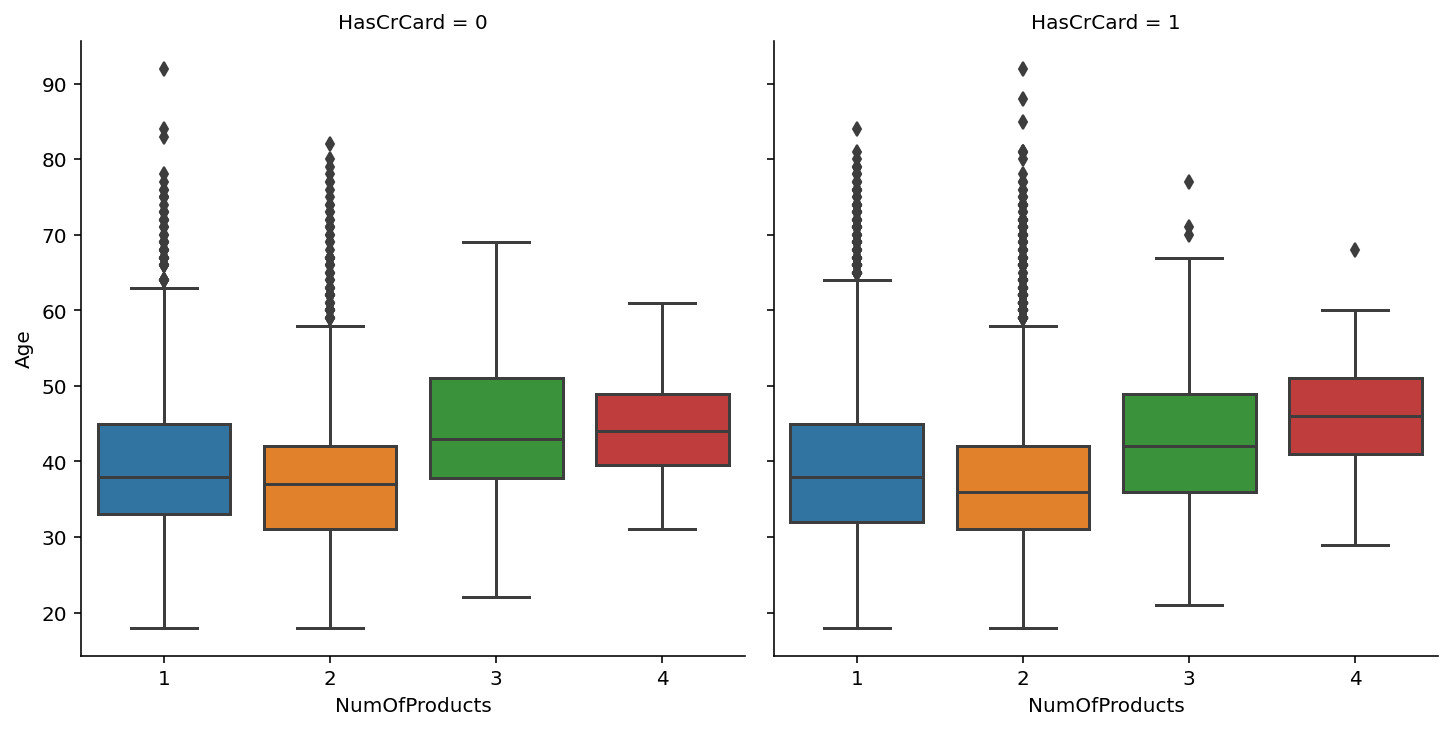

In [20]:
sns.catplot(
    x='NumOfProducts',y='Age', col='HasCrCard', data=df,
    kind='box', height=5, aspect=1)

### The Proportion of Churn Customers

#### Calculate from the summation

In [21]:
px.pie(
    df, values='Exited', names='Geography',
    title='SUM of Exited customers', height=400)

![](./img/img2.png) 

#### Calculate from the ratio per country

Since "Exited = 0" means not churn, "Exited = 1" means churn.  
So, I will find the average in order to get the churn/not churn ratio.

In [22]:
tmp = df.groupby('Geography').mean()
px.pie(
    tmp, values='Exited', names=tmp.index,
    title='MEAN of Exited customers', height=400)

![](./img/img3.png) 

#### Distribution plot of the churn customers

<AxesSubplot:xlabel='Age', ylabel='Density'>

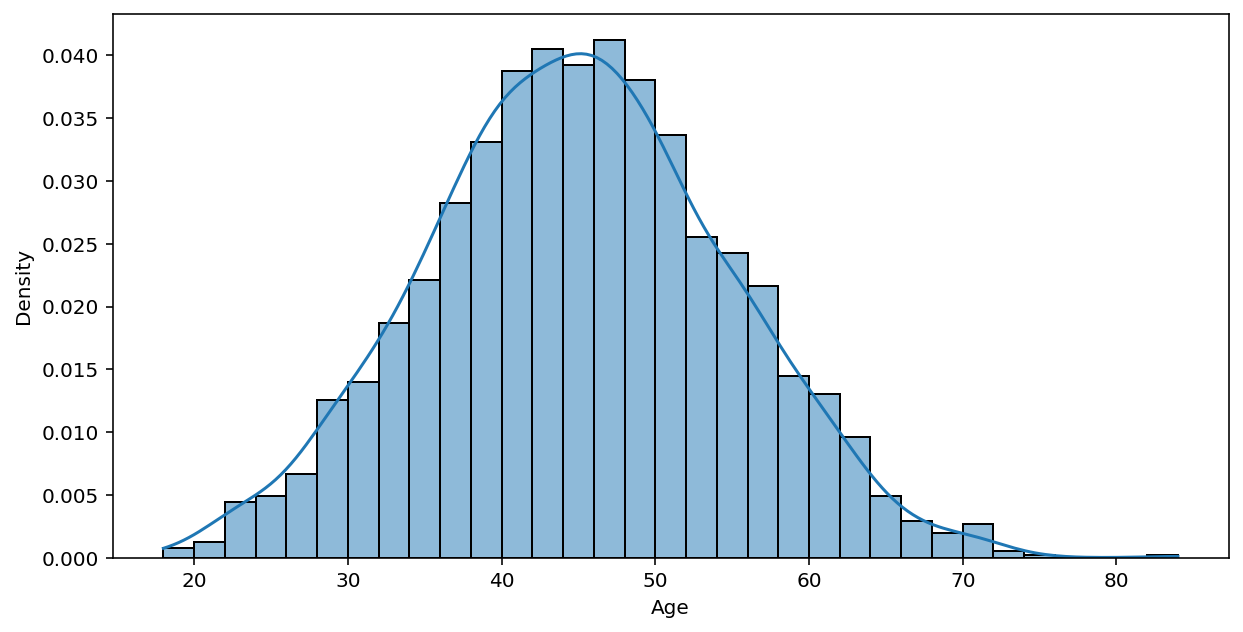

In [23]:
fig = plt.figure(figsize=(10,5))
sns.histplot(df[df['Exited']==1]['Age'], kde=True, stat='density')

It is a little similar to the normal distribution.  
Found that customers between 40-50 years old have the highest rate of churn.

#### The proportion of churn customers, categorized by the number of products.

Find the average in order to get the churn ratio.

In [24]:
df_prod = df.groupby('NumOfProducts').mean()

In [25]:
fig = px.bar(df_prod, x=df_prod.index, y='Exited')
fig.update_layout(
    title='Percent of Exited vs Num. of Products',
    xaxis_title='Num of Product(s)',
    height=400
)
fig.show()

![](./img/img4.png) 

Found that:  
Up to 100% of the customers who use 4 products are churn.  
Up to 82.7% of the customers who use 3 products are churn.  
Up to 7.6% of the customers who use 2 products are churn.  
Up to 27.7% of the customers who use 1 product are churn.  
  

Those results are rather unusual. From a common perspective, the more products customers use, the greater their likelihood of liking our company. However, the data indicate that it is not!

#### Quantity of customers, categorized by the number of products.

In [26]:
df.groupby('NumOfProducts').count()['Exited']

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: Exited, dtype: int64

#### Quantity of churn customers, categorized by the number of products.

In [27]:
df.groupby('NumOfProducts').sum()['Exited']

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

Customers who use 4 products churned 60 out of 60 customers.  
(This can confirm that it is 100% of the customers.)

#### Quantity of churn customers, categorized by gender.

In [28]:
df_gender = df.groupby('Gender').mean()

In [29]:
fig = px.bar(df_gender, x=df_gender.index, y='Exited')
fig.update_layout(
    title='Percent of Exited vs Gender',
    xaxis_title='Gender',
    height=400)
fig.show()

![](./img/img5.png) 

25% of female customers churned, and 16.4% of male customers churned.

---
# Kindly continue on the next notebook: (2 of 3) Logit_KNN_SVM_Naive Bayes